In [22]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
a=files.upload()

Saving scraped_yt.csv to scraped_yt (1).csv


In [23]:
import pandas as pd
datset = pd.read_csv('scraped_yt.csv')
datset.head(4)

,links,title,description,category
0,6bBQ3pd0YU8,american tap danc orchestra strike train chore...,atdo perform strike train joyc theater nyc cho...,0
1,JLU0c0mmvxg,robonaut space station nasa space scienc hd video,visit websit http www junglejoel com robonaut ...,4
2,IojqhtUwz50,european spacecraft pass key reentri test esa ...,visit websit http www junglejoel com european ...,4
3,-zgGVyADnFE,jordan bouri frontrow world danc franc qualifi,first perform world danc,0


In [0]:
import numpy as np
datset.fillna(method='ffill', inplace=True)

In [25]:
datset.isnull().sum()

links          0
title          0
description    0
category       0
dtype: int64

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras import metrics
from sklearn.model_selection import train_test_split

In [27]:
X = datset['description']
y = datset['category']
X.shape,y.shape

((8375,), (8375,))

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
X_train

<6281x36339 sparse matrix of type '<class 'numpy.int64'>'
	with 375185 stored elements in Compressed Sparse Row format>

In [0]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                363400    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 363,411
Trainable params: 363,411
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_train, y_train,
                    epochs=100,verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    validation_split=0.5
                   )

Train on 6281 samples, validate on 2094 samples
Epoch 1/100
6281/6281 [==============================] - 5s 788us/step - loss: -26.0999 - acc: 0.3340 - val_loss: -24.6781 - val_acc: 0.3099
Epoch 2/100
6281/6281 [==============================] - 5s 820us/step - loss: -26.0999 - acc: 0.3340 - val_loss: -24.6738 - val_acc: 0.3099
Epoch 3/100
6281/6281 [==============================] - 5s 826us/step - loss: -26.1000 - acc: 0.3342 - val_loss: -24.6705 - val_acc: 0.3099
Epoch 4/100
6281/6281 [==============================] - 5s 821us/step - loss: -26.1003 - acc: 0.3342 - val_loss: -24.6683 - val_acc: 0.3095
Epoch 5/100
6281/6281 [==============================] - 5s 816us/step - loss: -26.1000 - acc: 0.3342 - val_loss: -24.6680 - val_acc: 0.3095
Epoch 6/100
6281/6281 [==============================] - 5s 808us/step - loss: -26.1007 - acc: 0.3342 - val_loss: -24.6614 - val_acc: 0.3099
Epoch 7/100
6281/6281 [==============================] - 5s 814us/step - loss: -26.1003 - acc: 0.3340 - va

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

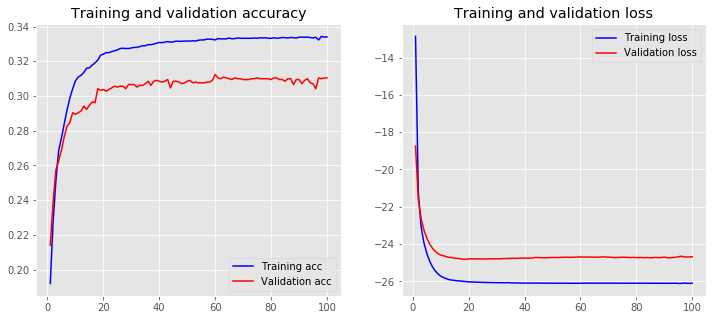

In [33]:
plot_history(history)

In [42]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.3343
